In [1]:
import pandas as pd
from hanziconv import HanziConv

import jieba
import jieba.posseg as pseg
import jieba.analyse


import sys
from optparse import OptionParser
import pprint
from prettytable import PrettyTable

In [30]:
df = pd.read_csv(open('../data/df_small.csv'))


In [21]:
df.head()

,Unnamed: 0,from,text
0,0,ud4097fbb4471c8c54512814bf0182e03,wd
1,1,ud4097fbb4471c8c54512814bf0182e03,嗨嗨
2,2,u96e826dccd3c9db56d684a5ddffc3154,蛤？
3,3,ud4097fbb4471c8c54512814bf0182e03,你是第二個使用者ＱＱ
4,4,u96e826dccd3c9db56d684a5ddffc3154,哈哈哈哈哈哈哈


In [32]:
fileTrainSeg = []

In [33]:
for i in range(len(df)):
    seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(str(df['text'][i]),cut_all=False)))])
    if i % 50000 == 0 :
        print(i)

0
50000


In [34]:
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(str(fileTrainSeg[i][0]).encode('utf-8'))
        fW.write('\n'.encode('utf-8'))

In [35]:
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i],)
PrintListChinese(fileTrainSeg[19])

蛤


In [36]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 4440
Words in train file: 594092
Alpha: 0.000578  Progress: 98.02%  Words/thread/sec: 276.26k  

In [37]:
model = word2vec.load('corpusWord2Vec.bin')
# print(model.vectors)

In [38]:
for i in range(0,24):
    print(model.vocab[i])

</s>
我
你
/
_
.
的
是
=
-
?
神
海
定
針
？
了
嗎
好
啊
ㄇ
不
↑
←


In [61]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'學生') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

宇宙
幸運
真人
高中
大學生
帥
腫哥
妳是
問你
高中生


In [62]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'錢') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

之前
上
工作
想到
只是
時間
他們
po
那麼
其他人


In [67]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'交換') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

聊聊
五分
土城
當
还
運動
還能
腦子
單獨
別想


In [54]:
index1,metrics1 = model.cosine(u'學生')
index2,metrics2 = model.cosine(u'聊天')
index3,metrics3 = model.cosine(u'社會')
# index4,metrics4 = model.cosine(u'錢')
# index5,metrics5 = model.cosine(u'可以')

In [55]:
import numpy as np
index01 = np.where(model.vocab == u'學生')
index02 = np.where(model.vocab == u'聊天')
index03 = np.where(model.vocab == u'社會')
# index04 = np.where(model.vocab == u'錢')
# index05 = np.where(model.vocab == u'可以')

In [56]:
index1 = np.append(index1,index01)
index2 = np.append(index2,index02)
index3 = np.append(index3,index03)
# index4 = np.append(index4,index04)
# index5 = np.append(index5,index05)

In [57]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA

In [58]:
rawWordVec = model.vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

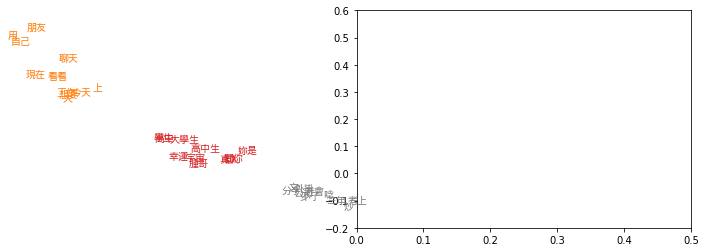

In [60]:
zhfont = matplotlib.font_manager.FontProperties(fname='wqy-microhei.ttc')
# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties = zhfont,color= 'C1')
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
# for i in index4:
#     ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
# for i in index5:
#     ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
ax.axis([0,0.5,-0.2,0.6])
plt.figure(figsize=(100,100))
plt.show()

In [12]:
def loadjieba():
  # 使用繁體中文詞庫
  jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
  # 將自定義詞庫加進來
  jieba.load_userdict("jieba_txt/userdict.txt") 
  # 停用詞
  jieba.analyse.set_stop_words("jieba_txt/stop_words.txt")
  jieba.analyse.set_idf_path("jieba_txt/idf.txt.big.txt")

  # input_file = open(filename, 'r', encoding = utf8())

# def cutandcount(filename):
#   content = open(filename, 'rb').read()
#   seglist = jieba.cut(content, cut_all=False)
#   chars = set(' 0123456789()$,:.。，/􀆿\r\n')


# # 原本在字典裡的 斷詞 ＆ 頻率
# # 讀入 og_dict
#   with open('newdict.txt','rt') as f:
#     for line in f:
#       k = line.split('\t')[0]
#       v = line.split('\t')[1][:-1]
      
#       if k in og_dict.keys():
#         og_dict[k] = v+1
#       else:
#         og_dict[k] = v


# # 斷新的文字檔之後，把新的詞加入並把頻率設成 1
# # 舊的詞在 value +1
#   for word in seglist:
#     if any((c in chars) for c in word):
#       continue
#     else:
#       if not word in og_dict.keys():
#         og_dict[word] = 1
#       else:
#         og_dict[word] = int(og_dict[word]) + 1

#   print('it is NEW DATA !!!!!'+str(og_dict)+'!!!!')

#   with open('newdict.txt','w') as f:
#       for k,v in og_dict.items():
#         f.write(k+'\t'+str(v)+'\n')



In [31]:

df = df[df['text'].str.contains("https|Britain")== False]

In [33]:
df.head()
len(df)

91340

## Groupby by 'from' column 

In [34]:
grouped_data = df.groupby('from')['text'].apply(lambda x: '/'.join(x)).reset_index()

In [35]:
test= grouped_data.head(100)

In [36]:
test.head()

,from,text
0,1000970273334199,找不到阿/安安/你有打LOL嗎/好吧，可以帶我嗎/安安/凸/Sor/嗯/約哪/有啊/你先約的...
1,1001070263323689,!?/唐寶寶/你那麼愛慕他ㄇ/嗨/先問問您期望本人的性別是?/了解/我是男的/抱歉沒有/請問...
2,1001967239901904,早/在床上發懶/爆/斷/魂/你在暗諷綠藻嘛/壞/話說我好餓ㄛ/窩不要這個qq/ㄋ早餐吃什麼/...
3,1003172849781848,甲/你要做我的0？/人生勝利組是不會來玩這個的/你一定不是c銘/也不是業王/葉你妹/被盜/其...
4,1003929993039131,吃噓/肥宅早/我們不是場外人/場外ㄈㄓ/我沒用了/安安/是喔/場外ㄈㄓ嗎/豪/斷/欸/在打手...


In [39]:
test

,from,text
0,1000970273334199,"[找不到阿, 安安, 你有打LOL嗎, 好吧，可以帶我嗎, 安安, 凸, Sor, 嗯, 約..."
1,1001070263323689,"[!?, 唐寶寶, 你那麼愛慕他ㄇ, 嗨, 先問問您期望本人的性別是?, 了解, 我是男的,..."
2,1001967239901904,"[早, 在床上發懶, 爆, 斷, 魂, 你在暗諷綠藻嘛, 壞, 話說我好餓ㄛ, 窩不要這個q..."
3,1003172849781848,"[甲, 你要做我的0？, 人生勝利組是不會來玩這個的, 你一定不是c銘, 也不是業王, 葉你..."
4,1003929993039131,"[吃噓, 肥宅早, 我們不是場外人, 場外ㄈㄓ, 我沒用了, 安安, 是喔, 場外ㄈㄓ嗎, ..."
5,1006942526092443,"[安, 是, 靠北哈哈, 是要說啥, 呃, 對呀, 好, 那我們來玩個遊戲, 1188-11..."
6,1007352782715651,"[嗨, ......., 看來是沒有, 我是有差點想打, 哈哈, 真的離開喔, 想說多打一句..."
7,1018989321532115,"[Hi, O.O, Ooo, 黃色那隻, 已知啊, Hi, 還沒睡啊, 不睡啊]"
8,1020089304775462,"[嗨, 嗨, 斷, 嗨, 哪裡人, 挖, 國外耶, 天龍國人啊, 感覺不同世界, 嗨, 安安..."
9,1020229148084642,[安安]


## split item

In [37]:
for i in range(len(test)):
    test.iloc[i][1] = test.iloc[i][1].split('/')

In [38]:
(test.iloc[0][1])

['找不到阿',
 '安安',
 '你有打LOL嗎',
 '好吧，可以帶我嗎',
 '安安',
 '凸',
 'Sor',
 '嗯',
 '約哪',
 '有啊',
 '你先約的啊',
 '喔',
 '輸入0088',
 '我懶的打了',
 '皮米屌',
 '這你嗎？',
 '魏癢癢',
 '哪裡人?',
 '住哪裡啦？',
 '超癢',
 '哪裡人?',
 '好遠',
 '其實還好',
 '新竹',
 '龍潭?',
 'ㄏㄅㄨㄐㄅㄌㄗㄋ',
 '三小',
 '幹又ㄋ',
 '掰掰',
 '凹?',
 '凸sor']

In [45]:
for i in range(10):
    temp = list()
    for j in range(len(test.iloc[i][1])):
        seglist = jieba.cut((test.iloc[i][1])[j])
        a = "/".join(seglist)
        temp.append(a)
    print(temp)
#     df['cut_list'][i] = temp
#         print("/ ".join(seglist))

['找/不到/阿', '安安', '你/有/打/LOL/嗎', '好/吧/，/可以/帶/我/嗎', '安安', '凸', 'Sor', '嗯', '約/哪', '有/啊', '你/先約/的/啊', '喔', '輸入/0088', '我/懶/的/打/了', '皮米/屌', '這你/嗎/？', '魏癢/癢', '哪裡/人/?', '住/哪裡/啦/？', '超癢', '哪裡/人/?', '好遠', '其實/還好', '新竹', '龍潭/?', 'ㄏ/ㄅ/ㄨ/ㄐ/ㄅ/ㄌ/ㄗ/ㄋ', '三小', '幹/又/ㄋ', '掰掰', '凹/?', '凸/sor']
['!/?', '唐寶寶', '你/那麼/愛慕/他/ㄇ', '嗨', '先/問問/您/期望/本人/的/性別/是/?', '了解', '我/是/男/的', '抱歉/沒有', '請問/您/有/玩龍族/拼圖/嗎/？', '我輸/掉/可以/安慰/我/一下/嗎', '如果/你/安慰/我/我/會/很/開心/的', '我/好/想/尿/尿', '有/點/髒', '而且/要/清/很/麻煩/欸', '乾/你/怎麼/知道/我/是/男/的', 'What', 'Are/ /you/ /kidding/ /me', '真的/嗎', '下次/試試/看', '我/好/想/尿/尿', '這是/舒服/的/事/ /不用/怕', 'ㄋ/會/舒服/啊/ㄅ/4/我', '不是/啊/誰/跟/你/說/我/要/用/舔/ㄉ/ㄌ', '用/毛毛/的/棒子/刷/一刷/R', '好/啦/我/要/去/洗澡/ㄌ/我/女友/在/找/我/\n/妹妹/ㄅ/ㄅ', '我剛/洗完/澡/ /嗨', '真的假/的/啊', '有緣', '啊/ /可惜/ /我還/沒/開始/吹', '好/的', '你/真/貼心', '好/那/我/先/吹/你/等/我/一下/XDD', '回來/ㄌ', '紅豆餅/是/怎樣/XDD', '會/嗎/哈哈哈', '哈哈哈哈/別理/他/他/怪人', '(/拍拍', '超可愛的/哈哈哈/XDD', '但/看到/桐人/我/必須/噓/!', '好/啦/別/難過', '你/難過/我/心痛', '幹嘛/這樣/ /我/很/真心/欸', '你/心痛/我/心痛/我/更/心痛', '你/也/很/讓/我/感到/很窩心', 'ˊ/ㄇ/ˋ', '你/說/ㄇ/嗎', '注音/ㄇ/啊', '喔/喔/ /那/

In [ ]:
for i in range(len(df)):
    seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(str(df['text'][i]),cut_all=False)))])
    if i % 50000 == 0 :
        print(i)